# Homework 3: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'shruthis'

Worked with iviev, dimac, and austinam

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
pokemon_df = pd.read_csv('Pokemon.csv')
us_df = pd.read_csv('USvideos.csv')
us_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64

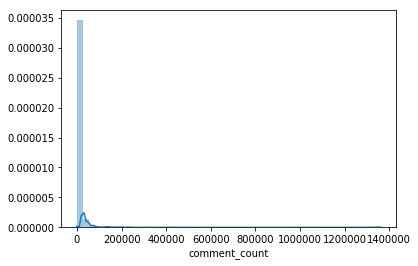

In [38]:
sns.distplot(us_df['comment_count'])
us_df['comment_count'].describe()

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64

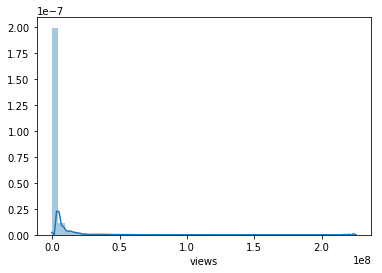

In [39]:
sns.distplot(us_df['views'])
us_df['views'].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

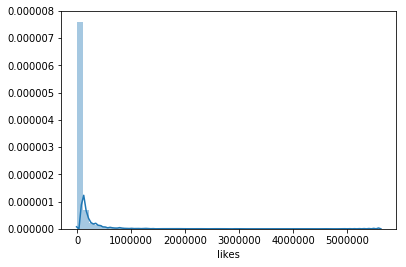

In [40]:
sns.distplot(us_df['likes'])
us_df['likes'].describe()

count    4.094900e+04
mean     3.711401e+03
std      2.902971e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.310000e+02
75%      1.938000e+03
max      1.674420e+06
Name: dislikes, dtype: float64

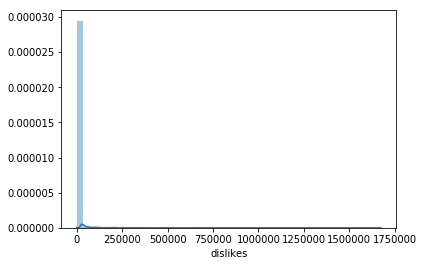

In [41]:
sns.distplot(us_df['dislikes'])
us_df['dislikes'].describe()

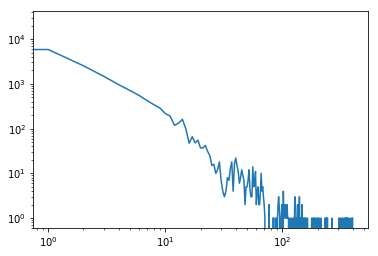

In [7]:
log_histo_comment = plt.plot(np.histogram(us_df['comment_count'],bins=400)[0])
log_histo_comment[0].axes.set_xscale("log")
log_histo_comment[0].axes.set_yscale("log")

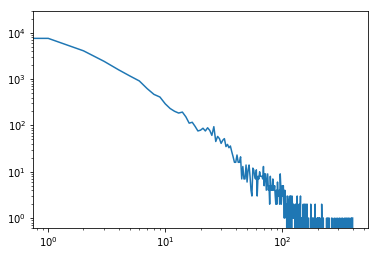

In [8]:
log_histo_views = plt.plot(np.histogram(us_df['views'],bins=400)[0])
log_histo_views[0].axes.set_xscale("log")
log_histo_views[0].axes.set_yscale("log")

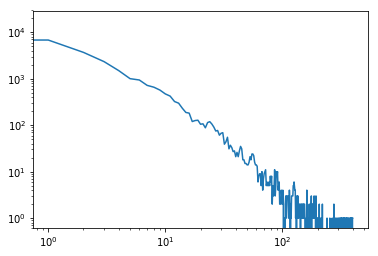

In [9]:
log_histo_likes = plt.plot(np.histogram(us_df['likes'],bins=400)[0])
log_histo_likes[0].axes.set_xscale("log")
log_histo_likes[0].axes.set_yscale("log")

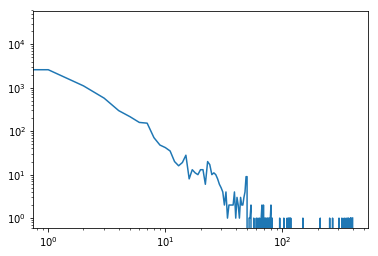

In [10]:
log_histo_dislikes = plt.plot(np.histogram(us_df['dislikes'],bins=400)[0])
log_histo_dislikes[0].axes.set_xscale("log")
log_histo_dislikes[0].axes.set_yscale("log")

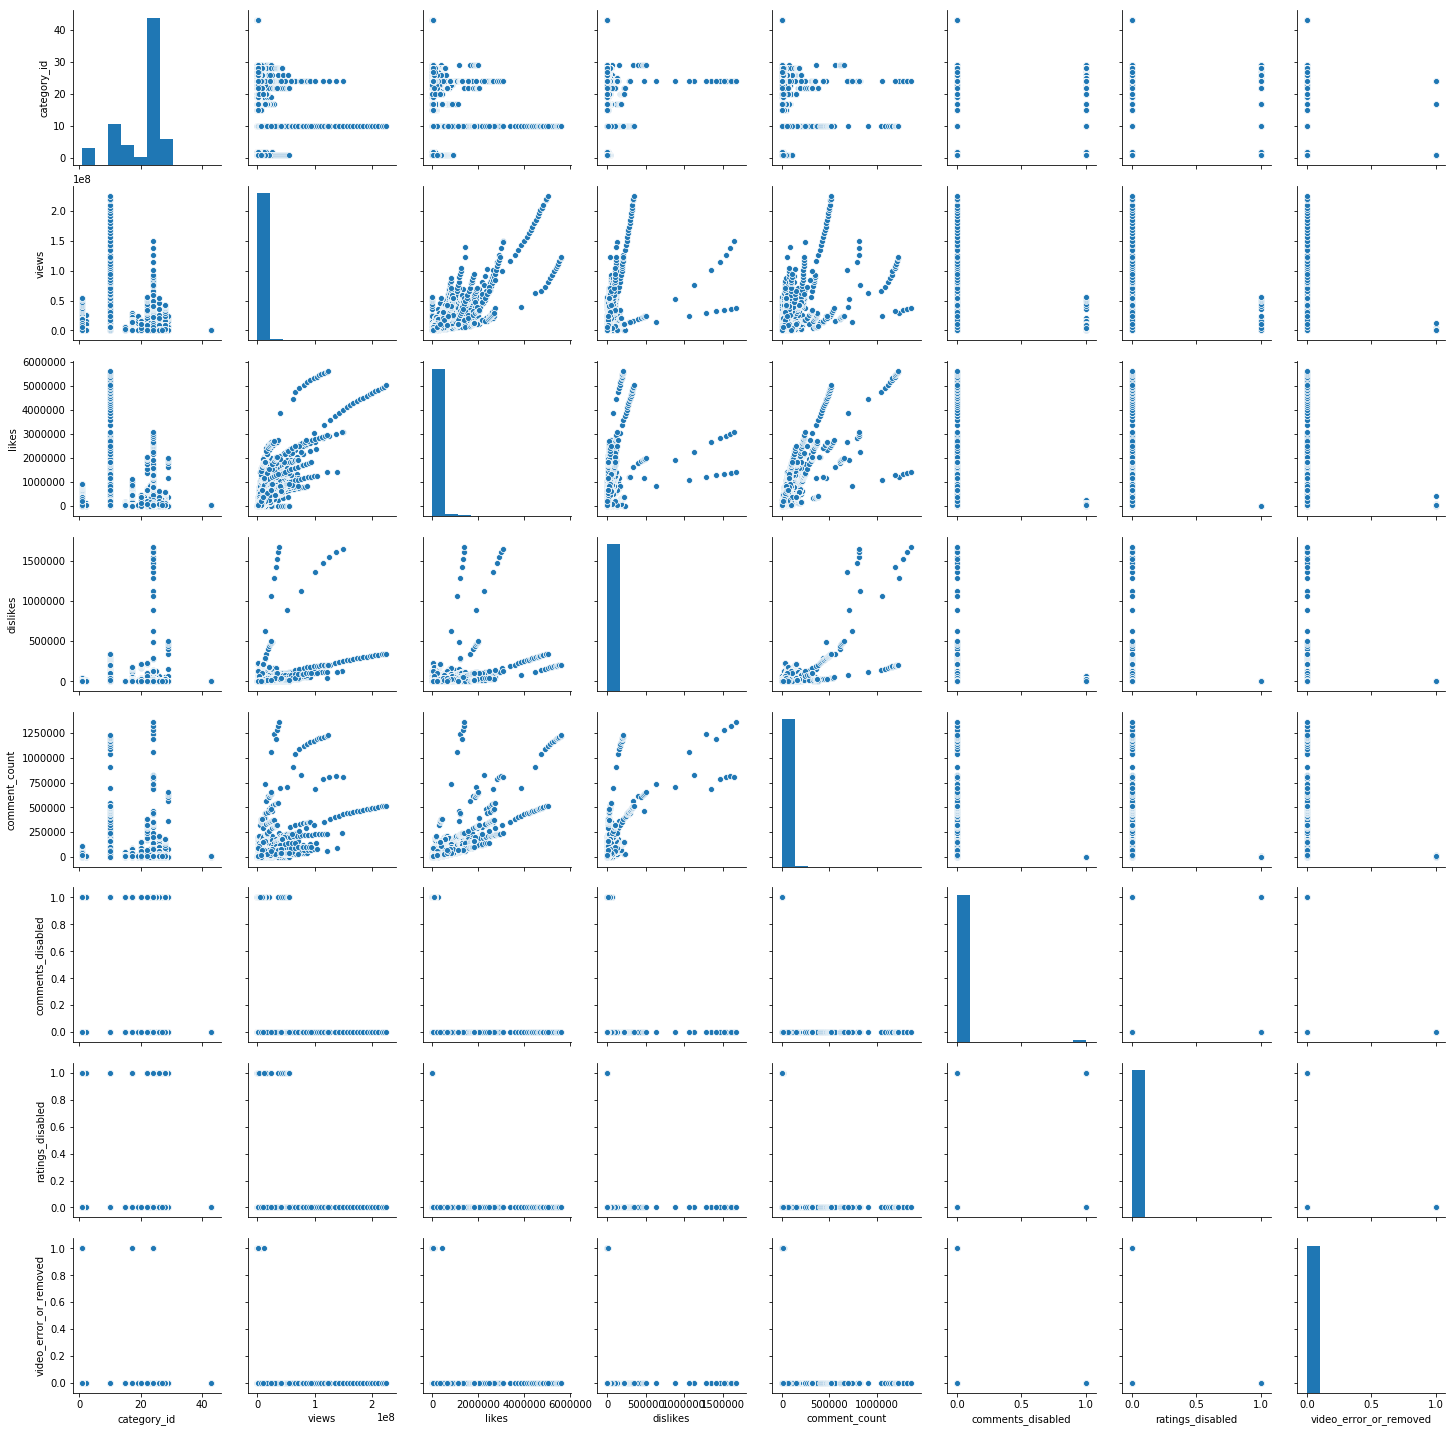

In [11]:
sns.pairplot(us_df)

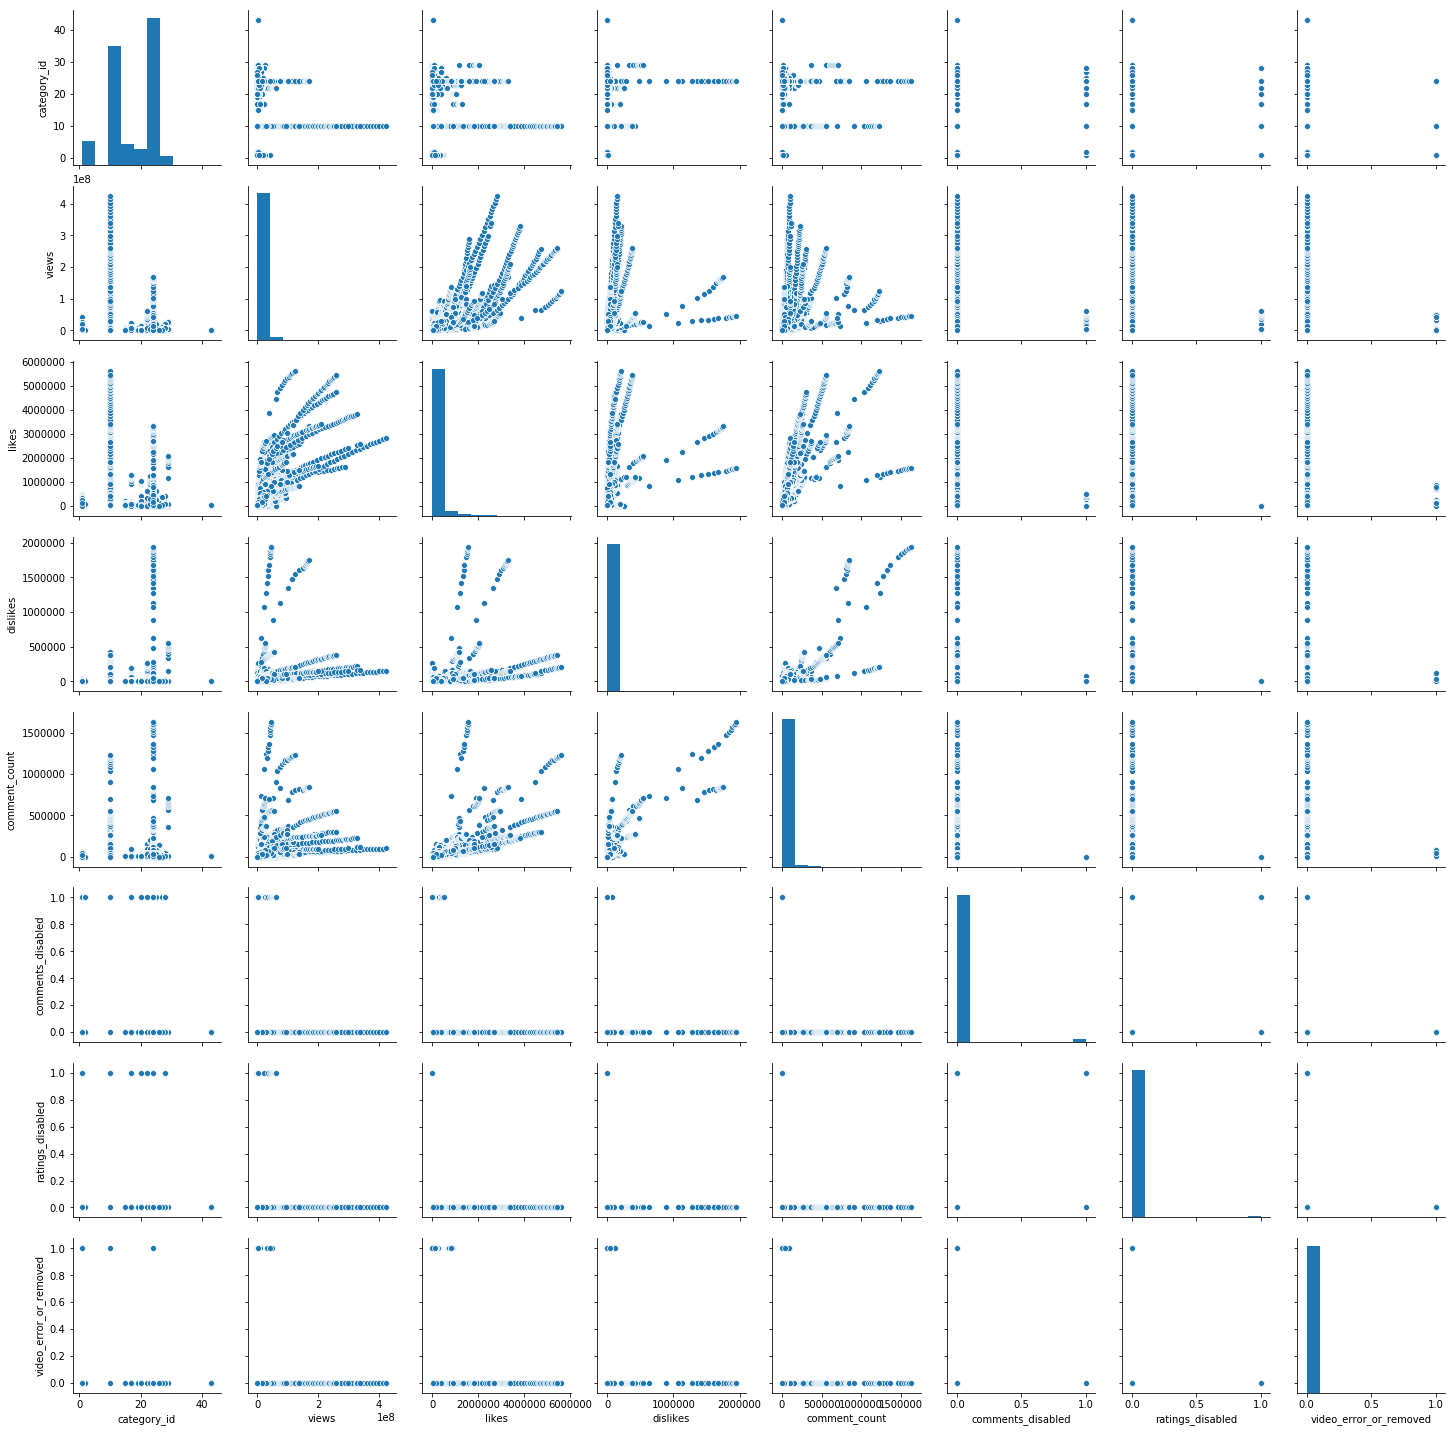

In [12]:
gb_df = pd.read_csv('GBvideos.csv')
sns.pairplot(gb_df)

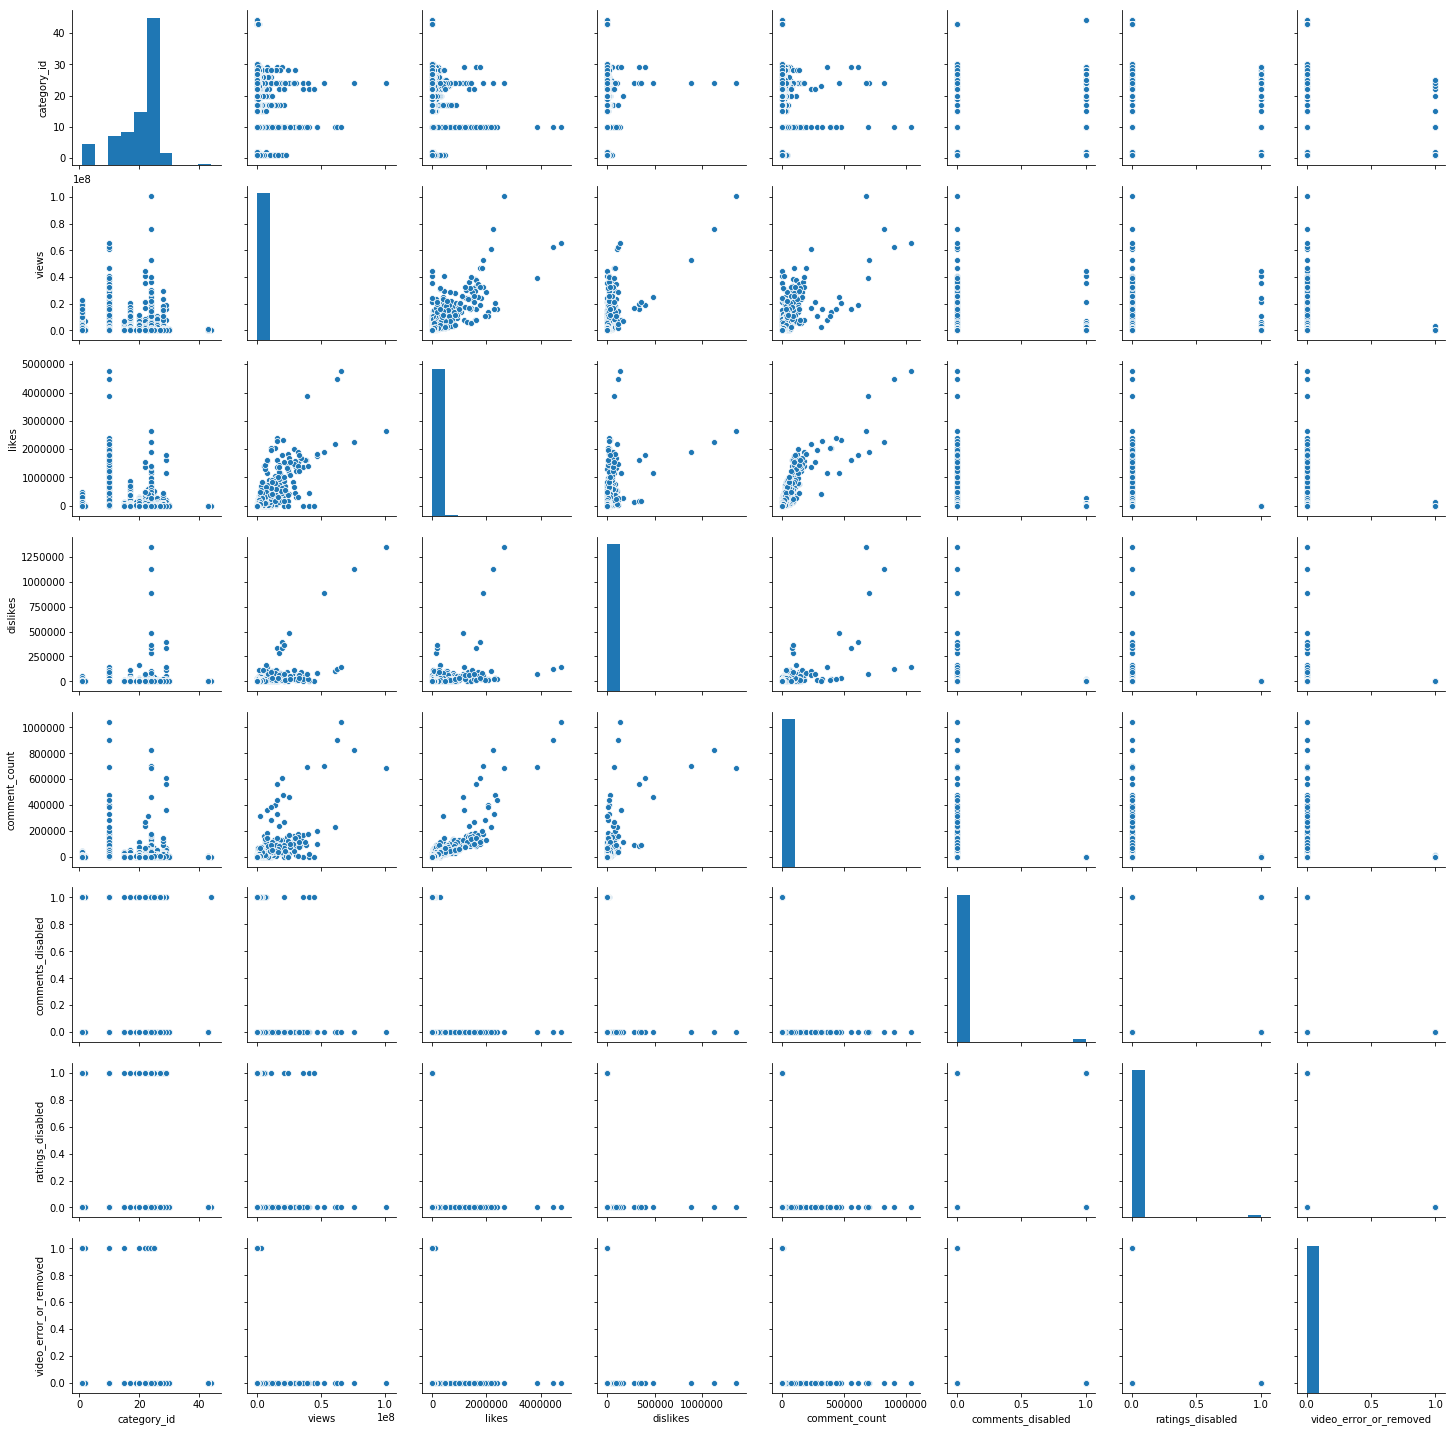

In [13]:
fr_df = pd.read_csv('FRvideos.csv')
sns.pairplot(fr_df)

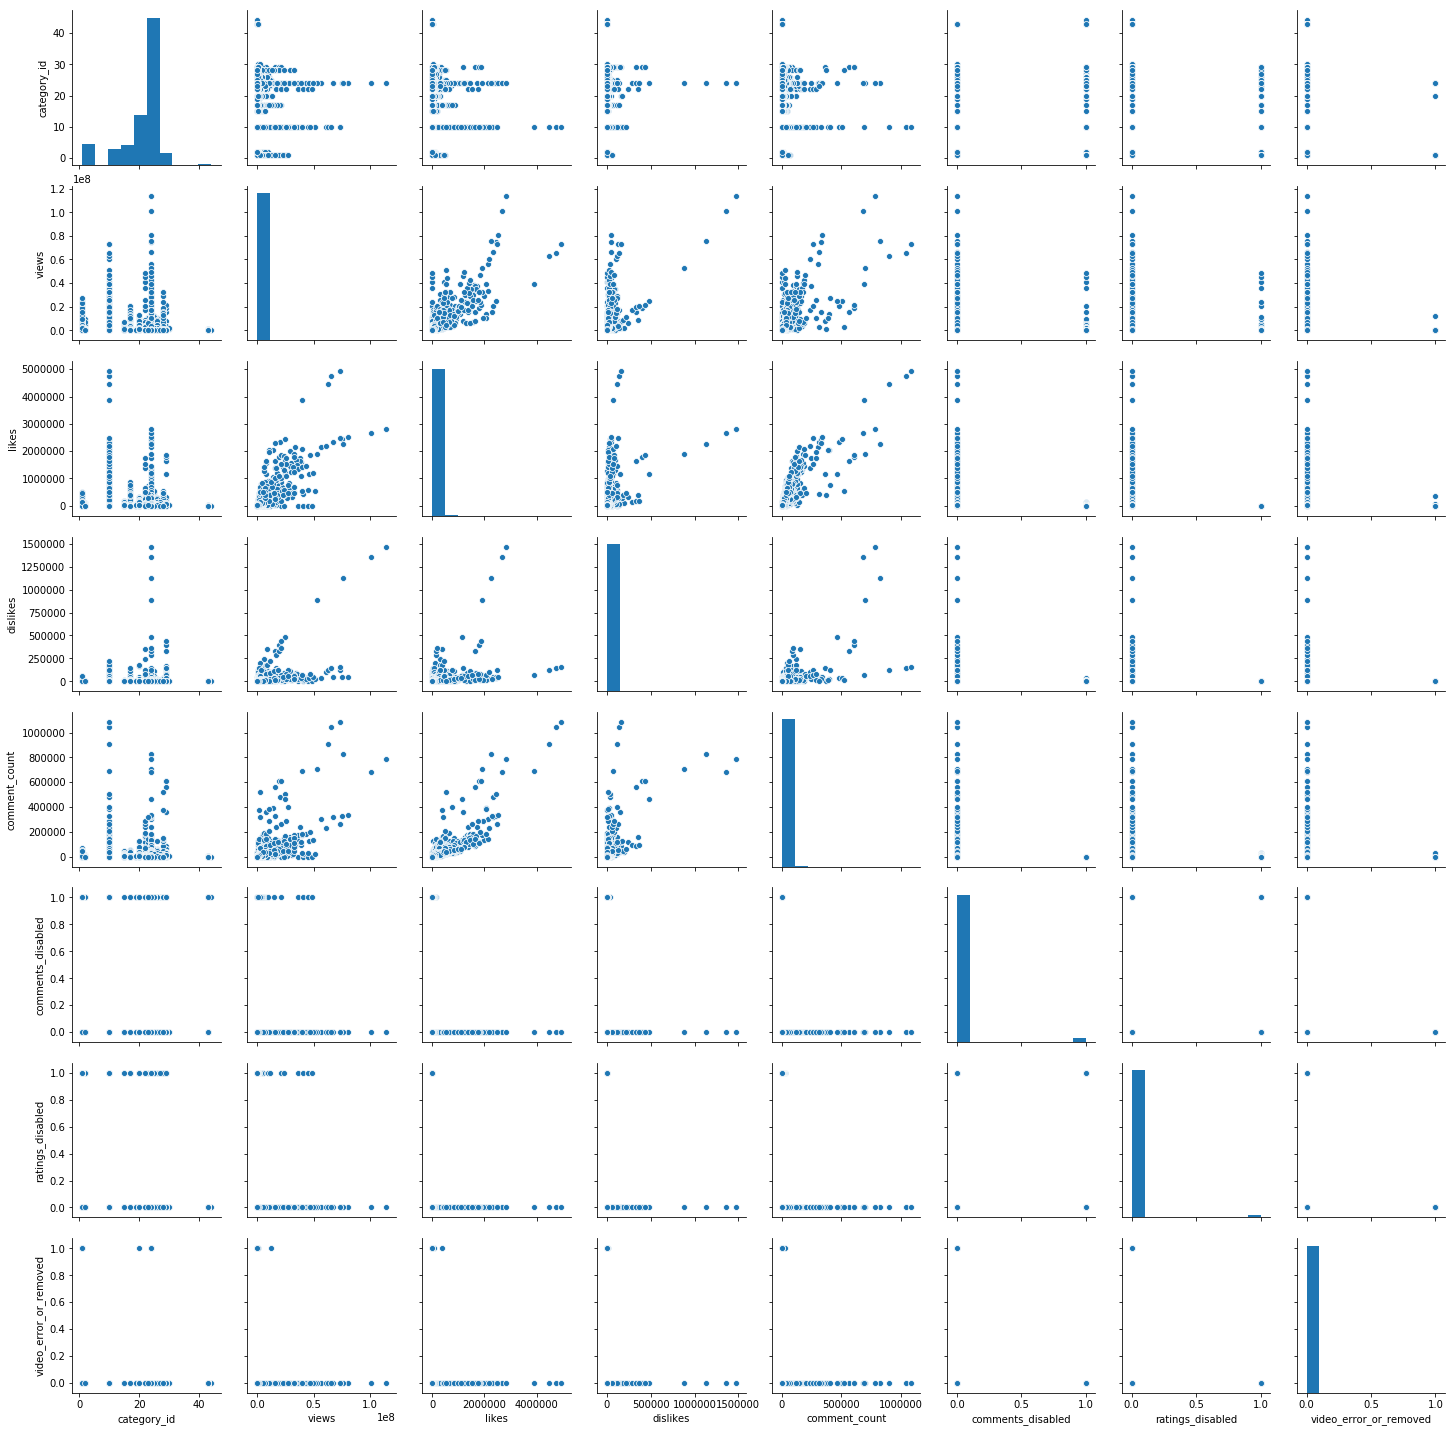

In [14]:
de_df = pd.read_csv('DEvideos.csv')
sns.pairplot(de_df)

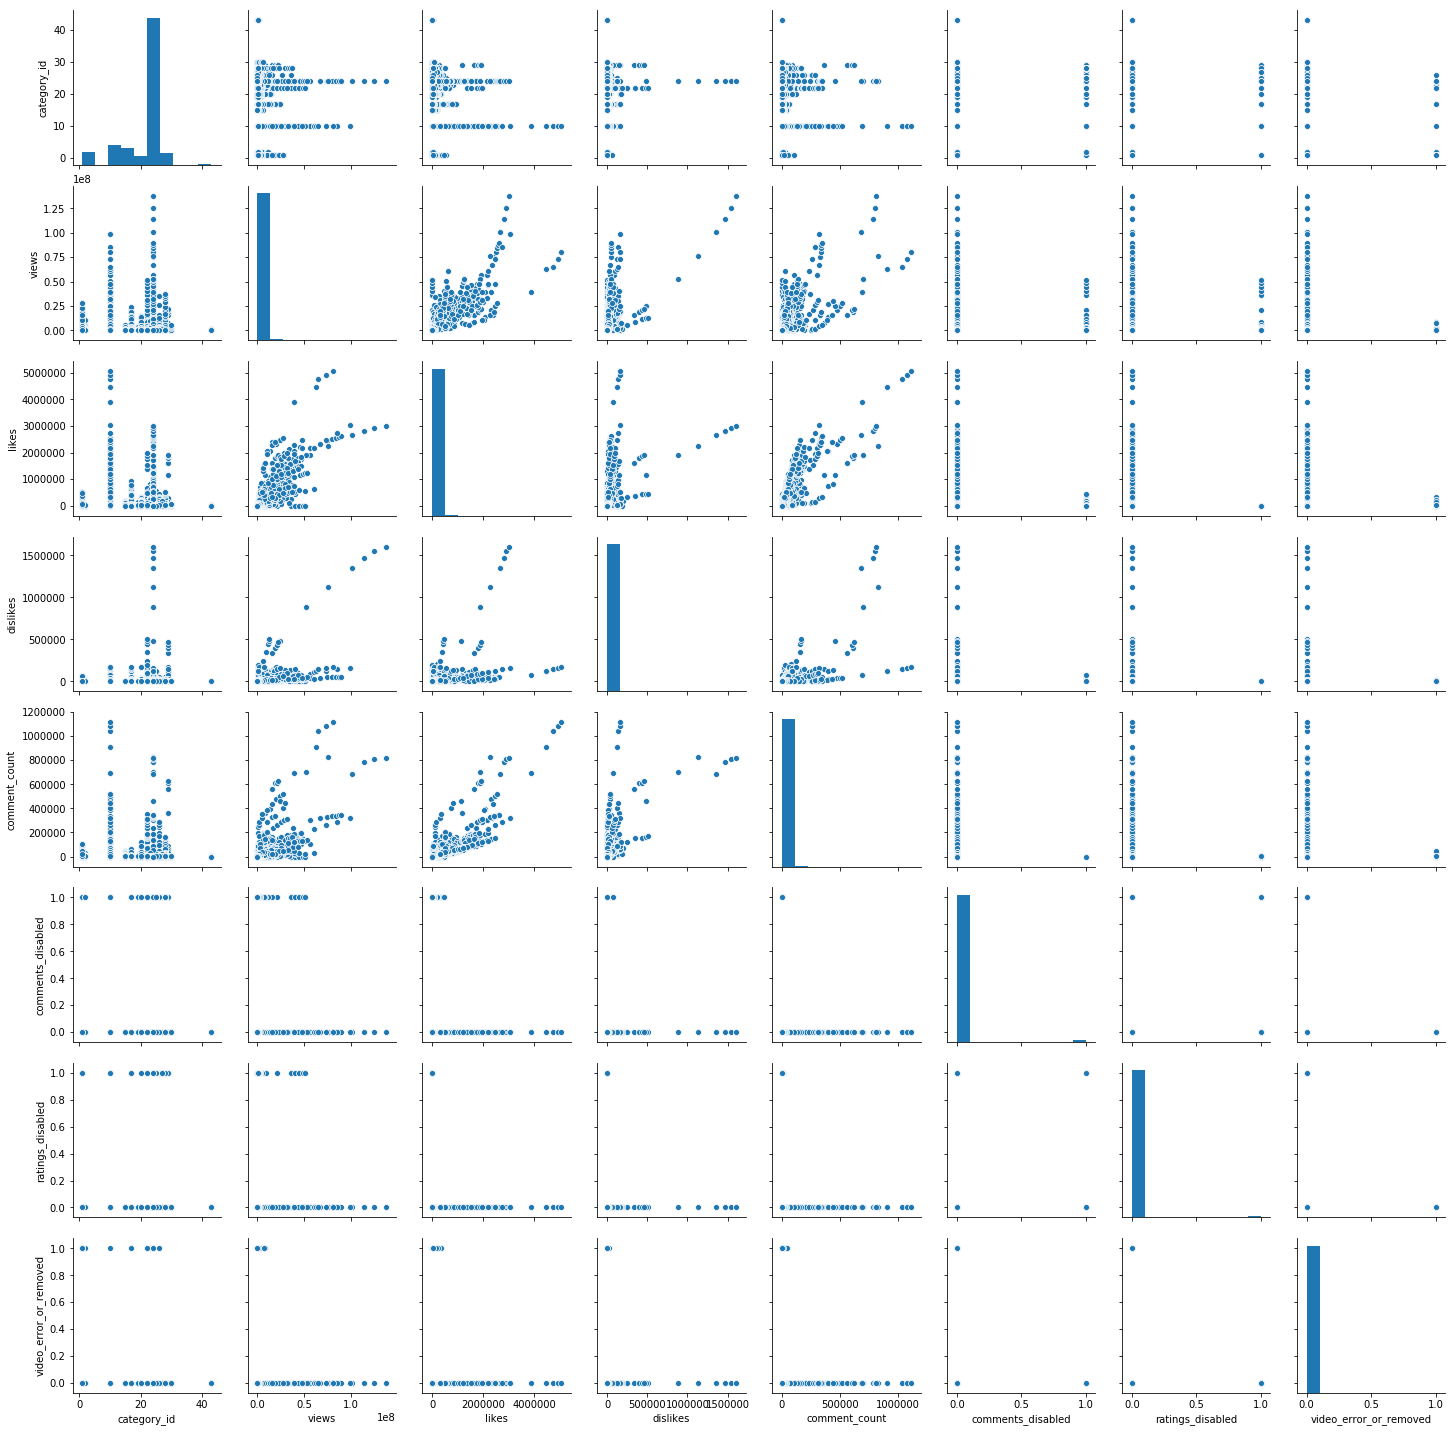

In [15]:
ca_df = pd.read_csv('CAvideos.csv')
sns.pairplot(ca_df)

* The distribution of each histogram for comments, views, likes, and dislikes in the US video dataset is significantly skewed to the right. Each variable is also noted to have a wide range:
    * comment_count had a range of (0, 1361580)
    * views had a range of (549, 225211900)
    * likes had a range of (0, 5613827)
    * dislikes had a range of (0, 1674420)
    
* Each of the log transformations appear to follow a Power log distribution.

* The US pair plot was interesting because it indicates that there is some correlation between the each combination of the variables views, likes, dislikes, and comment_count.

* The pair plots for the GB/DE/FR/CA regions look similar to the US pair plot in that each of them also show some correlation between combinations of the same variables views, likes, dislikes, and comment_count.

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

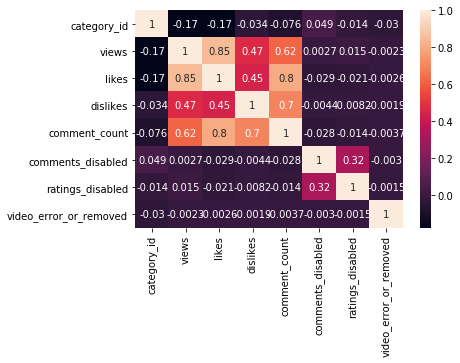

In [16]:
var_Corr = us_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns, annot=True)


The heat map also supported the same correlations noted above between the variables of views, likes, dislikes, and comment_count. The correlation coefficients were noted as such:
* views and likes = 0.85, indicating a strong positive correlation
* views and dislikes = 0.47, indicating a moderate positive correlation
* views and comment_count = 0.62, indicating a relatively strong positive correlation
* likes and dislikes = 0.45, indicating a moderate positive correlation
* likes and comment_count = 0.8, indicating a strong positive correlation
* dislikes and comment_count = 0.7, indicating a strong positive correlation

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols('views ~ C(category_id)', data=us_df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:            -7.0455e+05
No. Observations:               40949   AIC:                         1.409e+06
Df Residuals:                   40933   BIC:                         1.409e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.106e+06   1.48e+05     20.950      0.000    2.82e+06     3.4e+06
C(category_id)[T.2]   -1.75e+06   3.95e+05     -4.428      0.000   -2.53e+06   -9.76e+05
C(category_id)[T.10]  3.095e+06   1.73e+05     17.882      0.000    2.76e+06    3.43e+06
C(category_id)[T.15] -2.275e+06   2.79e+05     -8.145      0.000   -2.82e+06   -1.73e+06
C(category_id)[T.17]  -1.08e+06   2.14e+05     -5.053      0.000    -1.5e+06   -6.61e+05
C(category_id)[T.19] -2.252e+06   3.88e+05     -5.809      0.000   -3.01e+06   -1.49e+06
C(category_id)[T.20] -4.854e+05   2.92e+05     -1.664      0.096   -1.06e+06    8.63e+04
C(category_id)[T.22] -1.574e+06   1.95e+05     -8.072      0.000   -1.96e+06   -1.19e+06
C(category_id)[T.23] -1.626e+06   1.92e+05     -8.465      0.000      -2e+06   -1.25e+06
C(category_id)[T.24] -1.038e+06   1.65e+05     -6.301      0.000   -1.36e+06   -7.15e+05
C(category_id)[T.25] -2.514e+06   2.07e+05    -12.162      0.000   -2.92e+06   -2.11e+06
C(category_id)[T.26] -2.123e+06   1.86e+05    -11.441      0.000   -2.49e+06   -1.76e+06
C(category_id)[T.27] -2.393e+06    2.3e+05    -10.385      0.000   -2.85e+06   -1.94e+06
C(category_id)[T.28] -1.654e+06   2.08e+05     -7.932      0.000   -2.06e+06   -1.25e+06
C(category_id)[T.29] -1.424e+05   9.63e+05     -0.148      0.882   -2.03e+06    1.74e+06
C(category_id)[T.43] -2.203e+06   9.63e+05     -2.289      0.022   -4.09e+06   -3.16e+05
==============================================================================
Omnibus:                    71127.349   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         97974448.730
Skew:                          12.209   Prob(JB):                         0.00
Kurtosis:                     241.382   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = smf.ols('likes ~ views', data=us_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:            -5.3731e+05
No. Observations:               40949   AIC:                         1.075e+06
Df Residuals:                   40947   BIC:                         1.075e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e+04    627.053     19.473      0.000     1.1e+04    1.34e+04
views          0.0263   8.08e-05    325.376      0.000       0.026       0.026
==============================================================================
Omnibus:                    56358.973   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44741630.414
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                     164.224   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model2 = smf.ols('likes ~ comment_count', data=us_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 7.436e+04
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:            -5.4226e+05
No. Observations:               40949   AIC:                         1.085e+06
Df Residuals:                   40947   BIC:                         1.085e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.279e+04    690.976     47.451      0.000    3.14e+04    3.41e+04
comment_count     4.9106      0.018    272.698      0.000       4.875       4.946
==============================================================================
Omnibus:                    36131.022   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        157045231.024
Skew:                          -2.759   Prob(JB):                         0.00
Kurtosis:                     306.336   Cond. No.                     3.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* I first performed an ANOVA of views as the dependent variable and category_id as the independent variable. This yielded an R-squared value of 0.057, and a p-value (Prob F-statistic) of 0.00. This indicates that although there is a significant relationship between the 2 variables, there is a weak positive correlation between views and category_id, since only 5.7% of the variation in the distribution of views can be explained by the variable of category_id.
* I next created a regression model with the dependent variable of likes and an independent variable of views. This regression model yielded an R-squared value of 0.721, and a p-value of 0.00 (less than 0.01) for the views variable. This indicates that there is a significant relationship between views and likes, and there is also a strong positive correlation between the two since approximately 72.1% of the distribution of the number of likes can be explained by the number of views.

* Lastly, I also created a regression model for the dependent variable of likes again, with the independent variable of comment_count. This model yielded an R-squared value of 0.645 and a p-value of 0.00 (less than 0.01). This indicates that there is a significant relationship between likes and comment_counts as well, similar to likes and views. However, only 64.5% of the variance in the distribution of the likes variable is explained by the comment_count variable, which is lower than the percentage explained by the views independent variable.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

In [20]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


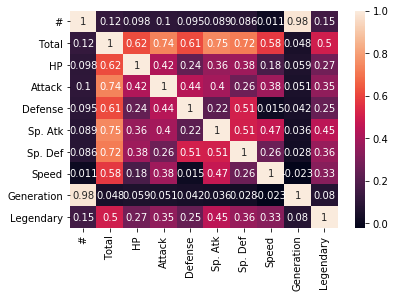

In [21]:
pokemon_corr = pokemon_df.corr()
sns.heatmap(pokemon_corr, xticklabels=pokemon_corr.columns, yticklabels=pokemon_corr.columns, annot=True)


* Of the ability point variables, the Total variable had high positive correlation coefficients with all of the individual ability variables (HP, Attack, Defense, Special Attack, Special Defense, and Speed).  This is understandable, since the Total variable is a sum of the values for the other ability variables. Excluding the Total variable, there was also a moderately strong coefficient for Special Defense and Defense, Special Defense and Special Attack, and Speed and Special Attack. The lowest correlation coefficients were noted between the abilities of Speed and Defense (0.015).

### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

In [22]:
pokemon_type_df = pokemon_df.groupby('Type 1')
pokemon_type_df.describe()


#                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  334.492754  210.445160   10.0  168.00  291.0  543.00  666.0   
Dark       31.0  461.354839  176.022072  197.0  282.00  509.0  627.00  717.0   
Dragon     32.0  474.375000  170.190169  147.0  373.00  443.5  643.25  718.0   
Electric   44.0  363.500000  202.731063   25.0  179.75  403.5  489.75  702.0   
Fairy      17.0  449.529412  271.983942   35.0  176.00  669.0  683.00  716.0   
Fighting   27.0  363.851852  218.565200   56.0  171.50  308.0  536.00  701.0   
Fire       52.0  327.403846  226.262840    4.0  143.50  289.5  513.25  721.0   
Flying      4.0  677.750000   42.437209  641.0  641.00  677.5  714.25  715.0   
Ghost      32.0  486.500000  209.189218   92.0  354.75  487.0  709.25  711.0   
Grass      70.0  344.871429  200.264385    1.0  187.25  372.0  496.75  673.0   
Ground     32.0  356.281250  204.899855   27.0  183.25  363.5  535.25  645.0   
Ice        24.0  423.541667  175.465834  124.0  330.25  371.5  583.25  713.0   
Normal     98.0  319.173469  193.854820   16.0  161.25  296.5  483.00  676.0   
Poison     28.0  251.785714  228.801767   23.0   33.75  139.5  451.25  691.0   
Psychic    57.0  380.807018  194.600455   63.0  201.00  386.0  528.00  720.0   
Rock       44.0  392.727273  213.746140   74.0  230.75  362.5  566.25  719.0   
Steel      27.0  442.851852  164.847180  208.0  305.50  379.0  600.50  707.0   
Water     112.0  303.089286  188.440807    7.0  130.00  275.0  456.25  693.0   

         Attack              ...     Speed         Total              \
          count        mean  ...       75%    max  count        mean   
Type 1                       ...                                       
Bug        69.0   70.971014  ...     85.00  160.0   69.0  378.927536   
Dark       31.0   88.387097  ...     98.50  125.0   31.0  445.741935   
Dragon     32.0  112.125000  ...     97.75  120.0   32.0  550.531250   
Electric   44.0   69.090909  ...    101.50  140.0   44.0  443.409091   
Fairy      17.0   61.529412  ...     60.00   99.0   17.0  413.176471   
Fighting   27.0   96.777778  ...     86.00  118.0   27.0  416.444444   
Fire       52.0   84.769231  ...     96.25  126.0   52.0  458.076923   
Flying      4.0   78.750000  ...    121.50  123.0    4.0  485.000000   
Ghost      32.0   73.781250  ...     84.25  130.0   32.0  439.562500   
Grass      70.0   73.214286  ...     80.00  145.0   70.0  421.142857   
Ground     32.0   95.750000  ...     90.00  120.0   32.0  437.500000   
Ice        24.0   72.750000  ...     80.00  110.0   24.0  433.458333   
Normal     98.0   73.469388  ...     90.75  135.0   98.0  401.683673   
Poison     28.0   74.678571  ...     77.00  130.0   28.0  399.142857   
Psychic    57.0   71.456140  ...    104.00  180.0   57.0  475.947368   
Rock       44.0   92.863636  ...     70.00  150.0   44.0  453.750000   
Steel      27.0   92.703704  ...     70.00  110.0   27.0  487.703704   
Water     112.0   74.151786  ...     82.00  122.0  112.0  430.455357   

                                                           
                 std    min     25%    50%     75%    max  
Type 1                                                     
Bug       117.875223  194.0  269.00  395.0  475.00  600.0  
Dark      109.126217  220.0  359.00  465.0  510.00  680.0  
Dragon    146.267538  300.0  420.00  600.0  680.00  780.0  
Electric  105.721952  205.0  362.25  477.5  520.00  610.0  
Fairy     123.781680  218.0  323.00  405.0  483.00  680.0  
Fighting  102.464378  210.0  326.50  455.0  497.50  625.0  
Fire      109.760496  250.0  368.00  482.0  534.00  680.0  
Flying    161.400124  245.0  462.50  557.5  580.00  580.0  
Ghost     110.072685  275.0  335.00  464.5  495.75  680.0  
Grass     106.650626  180.0  318.50  430.0  497.00  630.0  
Ground    123.913081  265.0  329.50  440

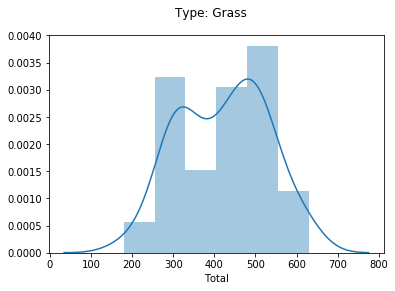

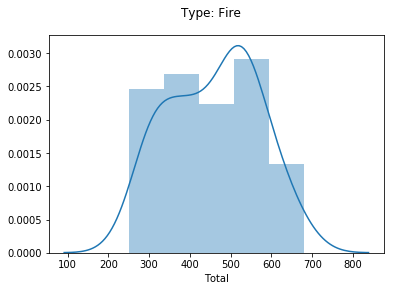

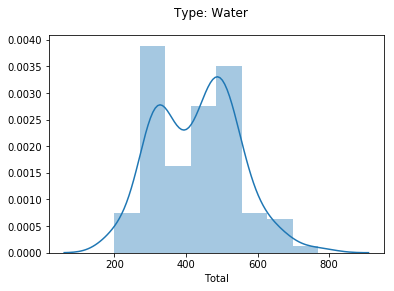

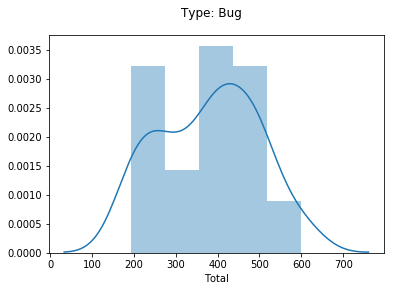

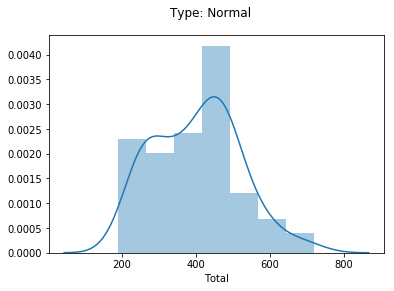

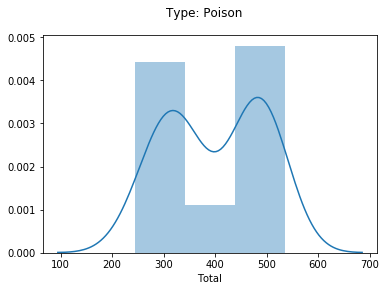

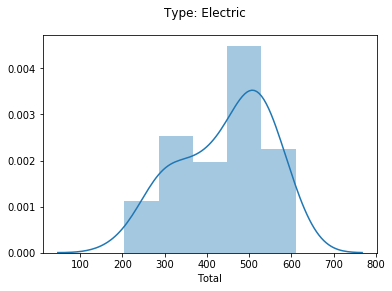

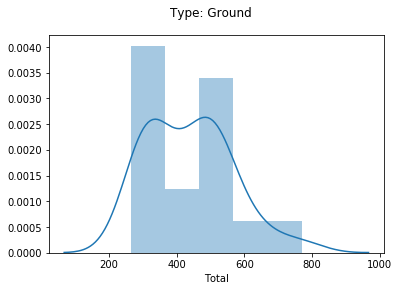

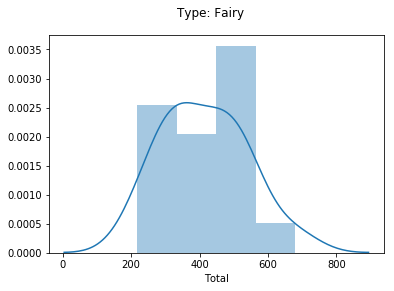

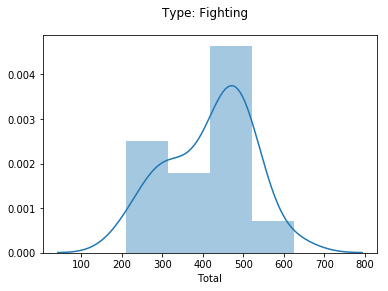

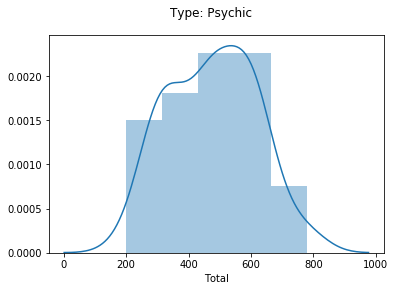

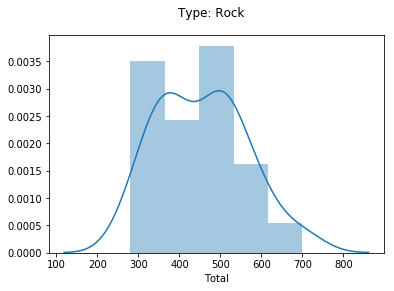

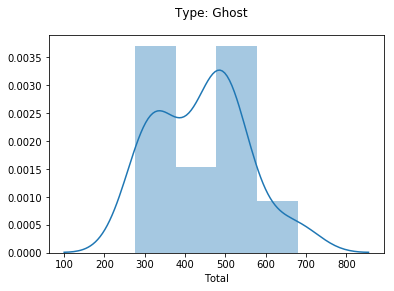

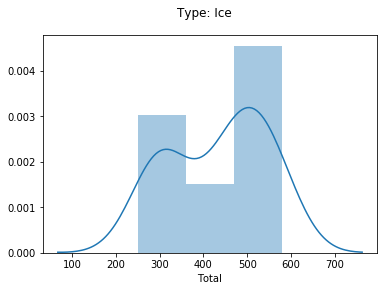

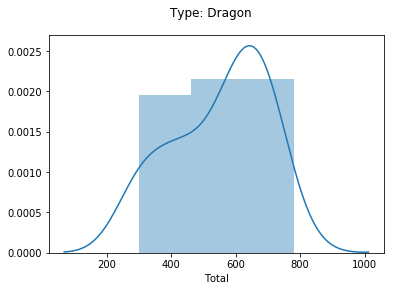

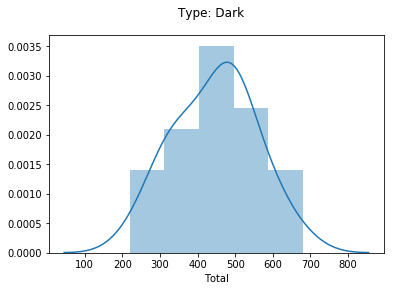

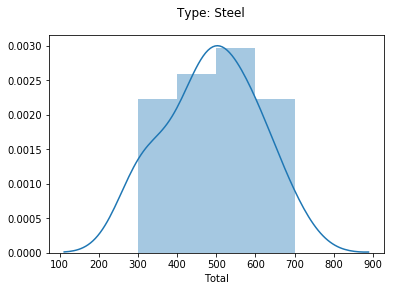

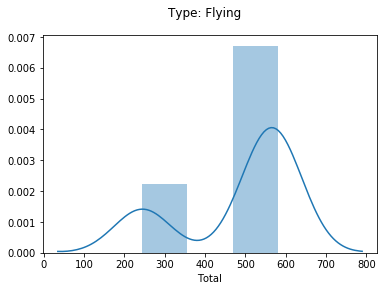

In [31]:
type_list = []
for item in pokemon_df['Type 1'].unique():
    type_list.append(item)
type_list

for type in type_list:
    poke_type = pokemon_df[pokemon_df['Type 1'] == type]
    printed_type = sns.distplot(poke_type.Total)
    plt.suptitle("Type: " + type)
    plt.show()


Below are the histogram distributions for each Pokemon type:
    1. Grass = bimodal
    2. Fire = uniform
    3. Water = bimodal
    4. Bug =biomodal
    5. Normal = skewed right
    6. Poison = bimodal
    7. Electric = skewed left
    8. Ground = bimodal
    9. Fairy = skewed right slightly
    10. Fighting = skewed left
    11. Psychic = skewed left
    12. Rock = bimodal + skewed right
    13. Ghost = bimodal + skewed right
    14. Ice = bimodal, skewed left
    15. Dragon = uniform
    16. Dark = normal
    17. Steel =normal
    18. Flying = bimodal

### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [24]:
pokemon_generation_df = pokemon_df.groupby('Generation')
pokemon_generation_df.describe()



#                                                              \
            count        mean        std    min     25%    50%     75%    max   
Generation                                                                      
1           166.0   75.819277  45.153246    1.0   36.25   76.5  115.00  151.0   
2           106.0  202.283019  28.769612  152.0  178.25  203.5  226.75  251.0   
3           160.0  321.968750  40.581221  252.0  287.75  321.5  358.25  386.0   
4           121.0  442.446281  31.250053  387.0  415.00  444.0  471.00  493.0   
5           165.0  574.272727  46.516108  494.0  534.00  574.0  615.00  649.0   
6            82.0  688.012195  21.291912  650.0  670.25  688.5  708.75  721.0   

           Attack             ...    Speed         Total              \
            count       mean  ...      75%    max  count        mean   
Generation                    ...                                      
1           166.0  76.638554  ...    92.25  150.0  166.0  426.813253   
2           106.0  72.028302  ...    85.00  130.0  106.0  418.283019   
3           160.0  81.625000  ...    86.25  180.0  160.0  436.225000   
4           121.0  82.867769  ...    91.00  135.0  121.0  459.016529   
5           165.0  82.066667  ...    95.00  145.0  165.0  434.987879   
6            82.0  75.804878  ...    80.00  126.0   82.0  436.378049   

                                                            
                   std    min    25%    50%     75%    max  
Generation                                                  
1           115.878076  195.0  325.0  436.5  500.00  780.0  
2           120.114133  180.0  330.0  422.5  500.00  700.0  
3           136.314193  190.0  310.0  435.0  530.00  780.0  
4           119.556541  194.0  350.0  485.0  530.00  720.0  
5           108.117934  255.0  328.0  465.0  505.00  700.0  
6           114.952340  200.0  335.0  464.0  512.25  700.0  

[6 rows x 64 columns]

count    166.000000
mean     426.813253
std      115.878076
min      195.000000
25%      325.000000
50%      436.500000
75%      500.000000
max      780.000000
Name: Total, dtype: float64


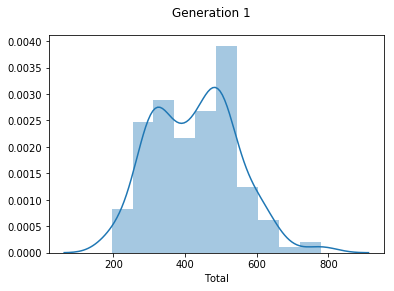

count    106.000000
mean     418.283019
std      120.114133
min      180.000000
25%      330.000000
50%      422.500000
75%      500.000000
max      700.000000
Name: Total, dtype: float64


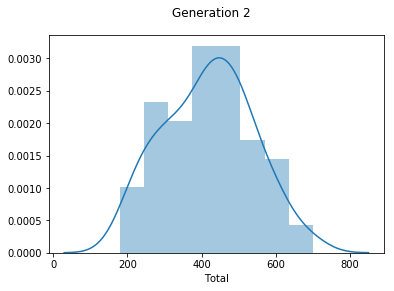

count    160.000000
mean     436.225000
std      136.314193
min      190.000000
25%      310.000000
50%      435.000000
75%      530.000000
max      780.000000
Name: Total, dtype: float64


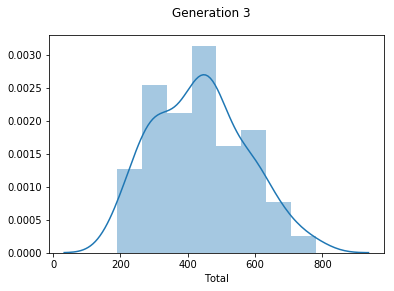

count    121.000000
mean     459.016529
std      119.556541
min      194.000000
25%      350.000000
50%      485.000000
75%      530.000000
max      720.000000
Name: Total, dtype: float64


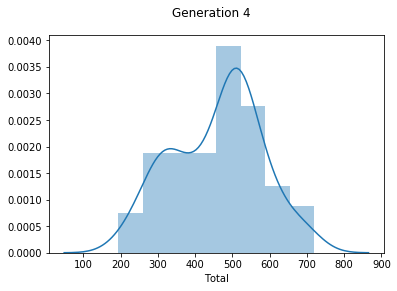

count    165.000000
mean     434.987879
std      108.117934
min      255.000000
25%      328.000000
50%      465.000000
75%      505.000000
max      700.000000
Name: Total, dtype: float64


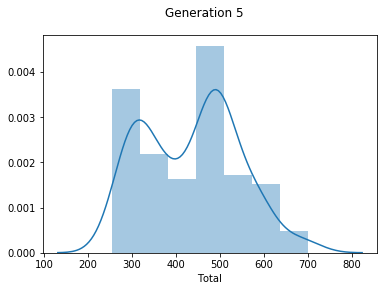

count     82.000000
mean     436.378049
std      114.952340
min      200.000000
25%      335.000000
50%      464.000000
75%      512.250000
max      700.000000
Name: Total, dtype: float64


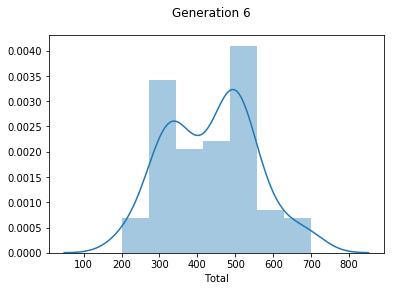

In [35]:
generation_list = []
for item in pokemon_df['Generation'].unique():
    generation_list.append(item)
generation_list

for generation in generation_list:
    poke_generation = pokemon_df[pokemon_df['Generation'] == generation]
    printed_generation = sns.distplot(poke_generation.Total)
    print(poke_generation['Total'].describe())
    plt.suptitle("Generation " + str(generation))
    plt.show()


Distributions of total ability points for each generation (6 generations in total):
    1. 1 = bimodal, skewed slightly left. Range of total ability points = (195,780)
    2. 2 = fairly normal distribution. Range of total ability points = (180,700)
    3. 3 = roughly normal. Range of total ability points = (190,780)
    4. 4 = skewed left. Range of total ability points = (194,720)
    5. 5 = bimodal, skewed right. Range of total ability points = (255,700)
    6. 6 = bimodal. Range of total ability points = (200,700)

I do not think the designers of Pokemon tried to address different distributions of ability points for each generation. While the ranges of total ability points are rough similar across generations (except for a higher minimum total for generation 5), each of the distributions themselves are different. This could be due to the types of Pokemon included in each generation — as seen in the previous question, the distribution varies for each type of pokemon, and newer types of pokemon may have only been included in later generations, which would also impact the overall distribution.


### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [37]:
model3 = smf.ols("Total ~ Q('Type 1')", data=pokemon_df).fit()
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.639
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           2.08e-09
Time:                        11:10:29   Log-Likelihood:                -4926.0
No. Observations:                 800   AIC:                             9888.
Df Residuals:                     782   BIC:                             9972.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 378.9275     13.913     27.235      0.000     351.616     406.239
Q('Type 1')[T.Dark]        66.8144     24.989      2.674      0.008      17.761     115.868
Q('Type 1')[T.Dragon]     171.6037     24.718      6.942      0.000     123.082     220.125
Q('Type 1')[T.Electric]    64.4816     22.297      2.892      0.004      20.713     108.250
Q('Type 1')[T.Fairy]       34.2489     31.294      1.094      0.274     -27.180      95.678
Q('Type 1')[T.Fighting]    37.5169     26.235      1.430      0.153     -13.983      89.017
Q('Type 1')[T.Fire]        79.1494     21.224      3.729      0.000      37.487     120.812
Q('Type 1')[T.Flying]     106.0725     59.438      1.785      0.075     -10.604     222.749
Q('Type 1')[T.Ghost]       60.6350     24.718      2.453      0.014      12.113     109.157
Q('Type 1')[T.Grass]       42.2153     19.606      2.153      0.032       3.729      80.702
Q('Type 1')[T.Ground]      58.5725     24.718      2.370      0.018      10.051     107.094
Q('Type 1')[T.Ice]         54.5308     27.388      1.991      0.047       0.767     108.294
Q('Type 1')[T.Normal]      22.7561     18.162      1.253      0.211     -12.897      58.409
Q('Type 1')[T.Poison]      20.2153     25.896      0.781      0.435     -30.619      71.050
Q('Type 1')[T.Psychic]     97.0198     20.686      4.690      0.000      56.413     137.627
Q('Type 1')[T.Rock]        74.8225     22.297      3.356      0.001      31.054     118.591
Q('Type 1')[T.Steel]      108.7762     26.235      4.146      0.000      57.276     160.276
Q('Type 1')[T.Water]       51.5278     17.687      2.913      0.004      16.808      86.248
==============================================================================
Omnibus:                       26.468   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.701
Skew:                           0.032   Prob(JB):                      0.00175
Kurtosis:                       2.386   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significance of difference in ability points was determined if the p-value was less than 0.05 (as this is a 95% regression analysis). The following Pokemon types had significantly different ability points:
* Dark, Dragon, Electric, Fire, Ghost, Grass, Ground, Ice, Psychic, Rock, Steel, and Water